In [112]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from statsmodels.tools.eval_measures import rmse

# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
# import plotly.plotly as py
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [113]:
df = pd.read_csv('../candidate.csv')
df['return'] = (df['f24'].shift(-78) - df['f24']) / df['f24']

### Remove Very High Correlation

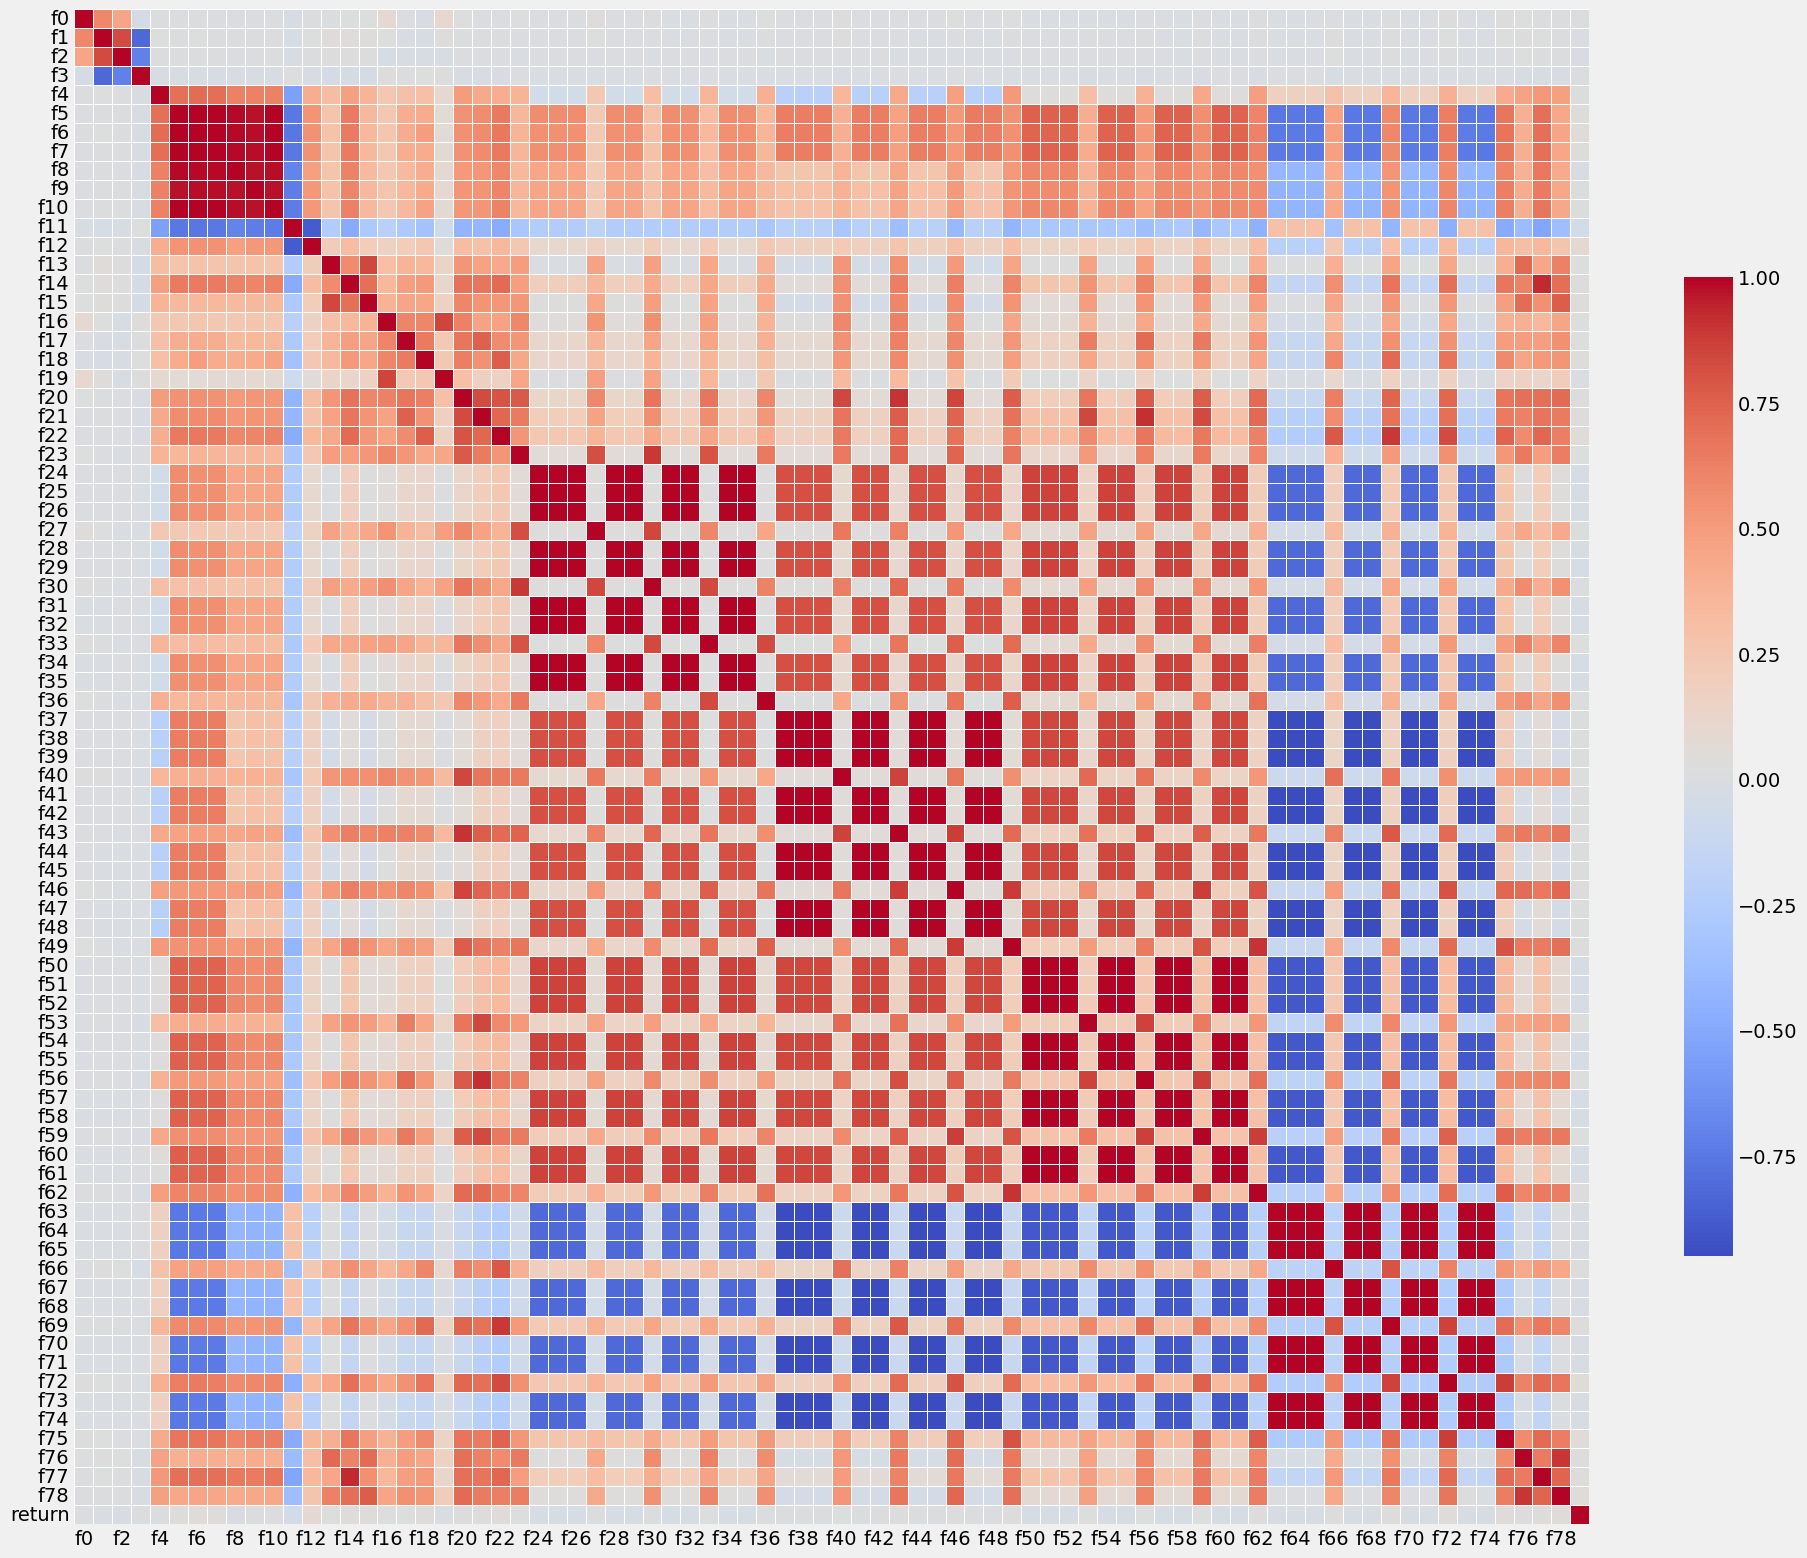

In [114]:
corr = df[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
       'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59',
       'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78','return']].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# # Optional: Adjust the layout
# plt.xticks(rotation=90, ha='center', fontsize=8)
# plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

# # Show the plot
plt.show()


In [115]:
ypred_corr = corr[['return']]
ypred_corr['abs_corr'] = abs(ypred_corr['return'])
ypred_corr = ypred_corr.sort_values('abs_corr')

In [117]:
ypred_corr.tail(20)

,return,abs_corr
f43,0.026960,0.026960
f66,0.028702,0.028702
f46,0.029907,0.029907
f49,0.031983,0.031983
f20,0.032205,0.032205
f15,0.033065,0.033065
f69,0.037159,0.037159
f14,0.037309,0.037309
f5,0.037879,0.037879
f77,0.038532,0.038532


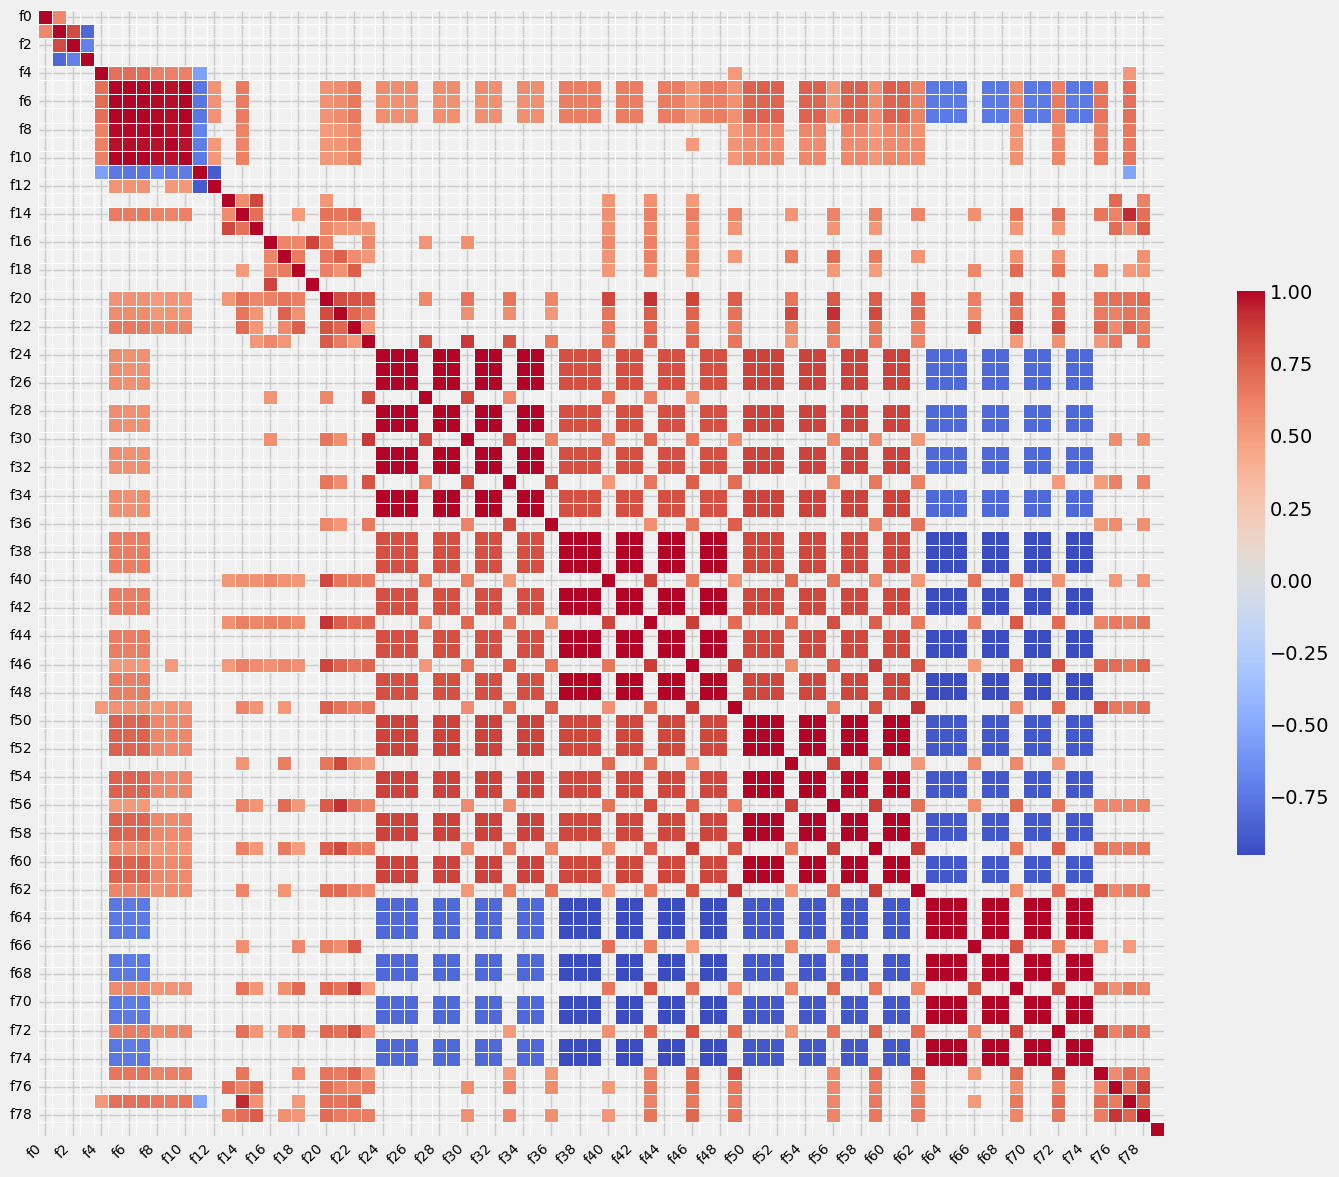

In [82]:
corr = df[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
       'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59',
       'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78','return']].corr()

# Define the threshold
t = 0.5  # Set your threshold here

# Create a mask for values below the threshold (both positive and negative)
mask = np.abs(corr) <= t

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))  # Adjust size as needed

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adjust the layout
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [83]:
df_corr = df[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
       'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59',
       'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78','return']]

In [84]:
corr['f24']['f25']

0.9999996804888667

In [46]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Example to load data from CSV

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create a DataFrame from the correlation matrix
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlation (diagonal elements)
corr_df = corr_df[corr_df['Variable 1'] != corr_df['Variable 2']]

# Sort by absolute correlation values in descending order
corr_df['abs_correlation'] = corr_df['Correlation'].abs()
sorted_corr_df = corr_df.sort_values(by='abs_correlation', ascending=False)

# Drop duplicate pairs
sorted_corr_df = sorted_corr_df.drop_duplicates(keep='first',subset=['abs_correlation'])

# Display the top pairs with the highest correlation
print(sorted_corr_df)  # Adjust the number in head() for more/less results


     Variable 1 Variable 2  Correlation  abs_correlation
3039        f38        f37     1.000000         1.000000
3118        f39        f37     1.000000         1.000000
5041        f63        f64     1.000000         1.000000
5198        f65        f63     1.000000         1.000000
3119        f39        f38     1.000000         1.000000
...         ...        ...          ...              ...
4506        f57         f3     0.000060         0.000060
307          f3        f70    -0.000043         0.000043
5612        f71         f3    -0.000031         0.000031
2686        f34         f0    -0.000019         0.000019
127          f1        f48     0.000013         0.000013

[3081 rows x 4 columns]


In [47]:
len(sorted_corr_df[sorted_corr_df['abs_correlation']>0.9]['Variable 1'].unique()),len(sorted_corr_df[sorted_corr_df['abs_correlation']>0.9]['Variable 2'].unique())

(46, 47)

In [48]:
sorted_corr_df.sort_values('Variable 1',inplace=True)

In [49]:
sorted_corr_df

,Variable 1,Variable 2,Correlation,abs_correlation
36,f0,f36,0.021329,0.021329
58,f0,f58,-0.001149,0.001149
60,f0,f60,-0.001993,0.001993
1,f0,f1,0.589572,0.589572
47,f0,f47,0.002312,0.002312
...,...,...,...,...
787,f9,f76,0.419754,0.419754
788,f9,f77,0.648422,0.648422
777,f9,f66,0.431235,0.431235
722,f9,f11,-0.722945,0.722945


In [50]:
sorted_corr_df[sorted_corr_df['abs_correlation']>=0.99].groupby('Variable 1').count().sort_values('Variable 2')

,Variable 2,Correlation,abs_correlation
Variable 1,,,
f10,2,2,2
f71,2,2,2
f7,2,2,2
f26,2,2,2
f68,2,2,2
f6,2,2,2
f52,2,2,2
f65,3,3,3
f64,3,3,3


In [51]:
sorted_corr_df.loc[(sorted_corr_df['abs_correlation']>=0.9) & (sorted_corr_df['Variable 1']=='f24')]

,Variable 1,Variable 2,Correlation,abs_correlation
1928,f24,f32,0.999981,0.999981
1931,f24,f35,0.999917,0.999917
1930,f24,f34,0.999926,0.999926


In [3]:
df.columns

Index(['time', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
       'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59',
       'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78'],
      dtype='object')

In [ ]:
df['f0_calc'] = df['f24']

In [61]:
return_type_columns = ['f0','f1','f2','f3','f11','f12']
price_type_columns = ['f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f13', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
       'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59',
       'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76']
integer_type_columns = ['f14','f15','f77','f78']

In [65]:
df

,time,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78
0,2015-11-18 09:30:00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,NaN,NaN,NaN
1,2015-11-18 09:35:00,0.001689,-0.001088,0.000058,0.000615,85.97,NaN,NaN,NaN,15.53,...,1.0004,1.0006,1.0001,1.0005,1.0006,1.0000,1.0006,67368.450,11762.0,933.0
2,2015-11-18 09:40:00,0.004288,0.004110,0.001356,0.000040,85.90,NaN,NaN,NaN,15.46,...,1.0003,1.0012,1.0003,1.0009,1.0013,1.0001,1.0012,46947.150,7726.0,469.0
3,2015-11-18 09:45:00,0.000268,0.008612,0.006797,-0.001845,85.84,NaN,NaN,NaN,15.74,...,1.0010,1.0007,0.9988,1.0019,1.0012,0.9988,1.0024,23487.700,5967.0,398.0
4,2015-11-18 09:50:00,0.001404,-0.005846,-0.003133,0.001615,85.15,NaN,NaN,NaN,15.76,...,1.0008,1.0004,0.9991,1.0013,1.0010,0.9989,1.0022,40561.200,6341.0,393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2020-12-07 14:11:00,-0.000019,0.000390,0.000007,-0.000126,99.52,11.00,11.06,11.01,12.08,...,1.0001,1.4803,1.4799,1.0003,1.4806,1.4799,1.0005,NaN,697.0,38.0
99996,2020-12-07 14:16:00,0.000281,0.000352,0.000380,-0.000022,99.60,11.01,11.08,11.03,12.10,...,1.0001,1.4802,1.4798,1.0003,1.4805,1.4797,1.0005,NaN,940.0,62.0
99997,2020-12-07 14:21:00,-0.000741,-0.000277,-0.000005,-0.000143,99.40,11.02,11.08,11.04,12.11,...,1.0002,1.4802,1.4797,1.0003,1.4805,1.4797,1.0005,2364.500,612.0,43.0
99998,2020-12-07 14:26:00,0.001594,0.002589,0.000373,-0.000308,100.08,11.07,11.13,11.08,12.15,...,1.0003,1.4799,1.4789,1.0006,1.4804,1.4789,1.0010,21739.125,2846.0,132.0


In [63]:
df['f24']

0        1.0000
1        1.0017
2        1.0060
3        1.0063
4        1.0077
          ...  
99995    0.6120
99996    0.6122
99997    0.6117
99998    0.6127
99999    0.6137
Name: f24, Length: 100000, dtype: float64

In [64]:
df['f24'].shift(1)

0           NaN
1        1.0000
2        1.0017
3        1.0060
4        1.0063
          ...  
99995    0.6120
99996    0.6120
99997    0.6122
99998    0.6117
99999    0.6127
Name: f24, Length: 100000, dtype: float64

# Transformation

In [123]:
df = pd.read_csv('../candidate.csv')
df['return'] = (df['f24'].shift(-78) - df['f24']) / df['f24']

In [124]:
return_type_columns = ['f0','f1','f2','f3','f11','f12']
price_type_columns = ['f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f13', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
       'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59',
       'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76']
integer_type_columns = ['f14','f15','f77','f78']

In [125]:
for col in price_type_columns:
    df[col] = (df[col] - df[col].shift(1))/df[col].shift(1)
    
for col in integer_type_columns:
    df[col] = (df[col] - df[col].shift(1))/df[col].shift(1)

In [126]:
df

,time,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f70,f71,f72,f73,f74,f75,f76,f77,f78,return
0,2015-11-18 09:30:00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001000
1,2015-11-18 09:35:00,0.001689,-0.001088,0.000058,0.000615,NaN,NaN,NaN,NaN,NaN,...,0.000600,0.000100,0.000500,0.000600,0.000000,0.000600,NaN,NaN,NaN,-0.001797
2,2015-11-18 09:40:00,0.004288,0.004110,0.001356,0.000040,-0.000814,NaN,NaN,NaN,-0.004507,...,0.000600,0.000200,0.000400,0.000700,0.000100,0.000600,-0.303129,-0.343139,-0.497320,-0.009642
3,2015-11-18 09:45:00,0.000268,0.008612,0.006797,-0.001845,-0.000698,NaN,NaN,NaN,0.018111,...,-0.000499,-0.001500,0.000999,-0.000100,-0.001300,0.001199,-0.499699,-0.227673,-0.151386,-0.009341
4,2015-11-18 09:50:00,0.001404,-0.005846,-0.003133,0.001615,-0.008038,NaN,NaN,NaN,0.001271,...,-0.000300,0.000300,-0.000599,-0.000200,0.000100,-0.000200,0.726912,0.062678,-0.012563,-0.010519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2020-12-07 14:11:00,-0.000019,0.000390,0.000007,-0.000126,0.000201,0.000910,-0.001805,0.000000,0.000829,...,-0.000068,0.000000,0.000000,0.000000,0.000068,0.000000,NaN,-0.417711,-0.355932,NaN
99996,2020-12-07 14:16:00,0.000281,0.000352,0.000380,-0.000022,0.000804,0.000909,0.001808,0.001817,0.001656,...,-0.000068,-0.000068,0.000000,-0.000068,-0.000135,0.000000,NaN,0.348637,0.631579,NaN
99997,2020-12-07 14:21:00,-0.000741,-0.000277,-0.000005,-0.000143,-0.002008,0.000908,0.000000,0.000907,0.000826,...,0.000000,-0.000068,0.000000,0.000000,0.000000,0.000000,NaN,-0.348936,-0.306452,NaN
99998,2020-12-07 14:26:00,0.001594,0.002589,0.000373,-0.000308,0.006841,0.004537,0.004513,0.003623,0.003303,...,-0.000203,-0.000541,0.000300,-0.000068,-0.000541,0.000500,8.193963,3.650327,2.069767,NaN


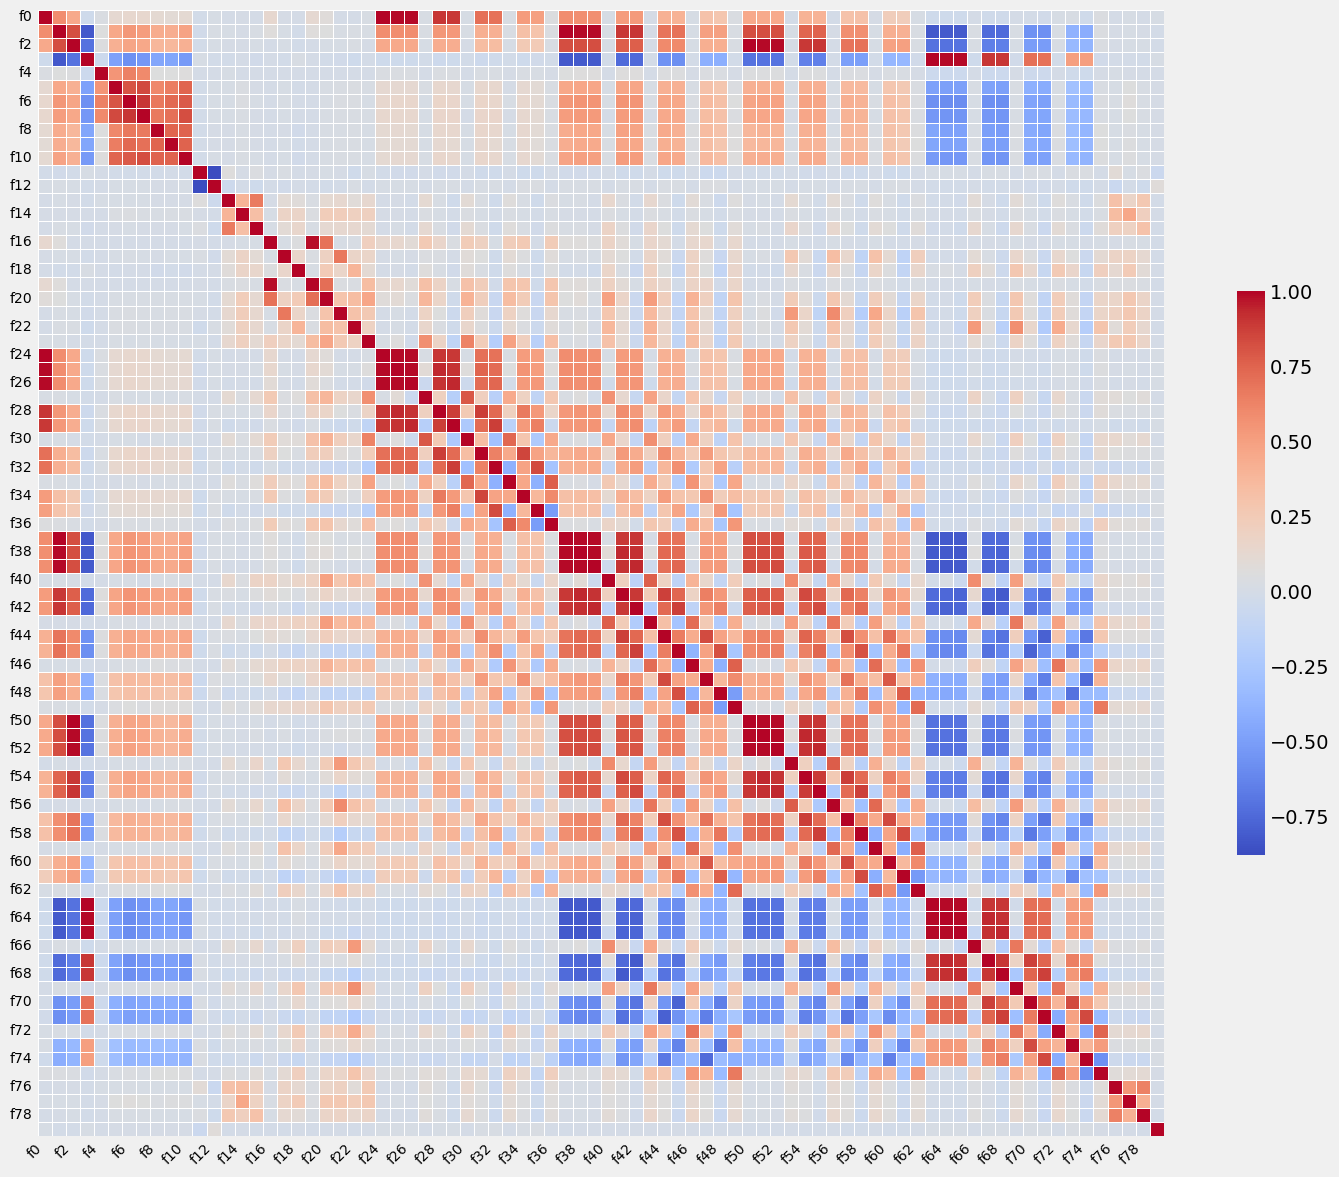

In [127]:
corr = df[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
       'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59',
       'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78','return']].corr()

# Define the threshold
t = 0  # Set your threshold here

# Create a mask for values below the threshold (both positive and negative)
mask = np.abs(corr) <= t

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))  # Adjust size as needed

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adjust the layout
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [128]:
ypred_corr = corr[['return']]
ypred_corr['abs_corr'] = abs(ypred_corr['return'])
ypred_corr = ypred_corr.sort_values('abs_corr')

In [129]:
ypred_corr

,return,abs_corr
f23,-0.000003,0.000003
f56,0.000071,0.000071
f53,-0.000159,0.000159
f14,0.000163,0.000163
f27,0.000241,0.000241
...,...,...
f35,0.025561,0.025561
f73,0.027993,0.027993
f11,-0.055508,0.055508
f12,0.079049,0.079049


In [130]:
ypred_corr.tail(20)

,return,abs_corr
f26,0.013142,0.013142
f65,0.013271,0.013271
f64,0.013358,0.013358
f68,0.014566,0.014566
f67,0.015057,0.015057
f60,-0.015501,0.015501
f29,0.016079,0.016079
f28,0.016185,0.016185
f71,0.017420,0.017420
f61,-0.017799,0.017799


In [111]:
ypred_corr.tail(20)

,return,abs_corr
f67,0.015057,0.015057
f60,-0.015501,0.015501
f29,0.016079,0.016079
f28,0.016185,0.016185
f71,0.017420,0.017420
f61,-0.017799,0.017799
f70,0.019750,0.019750
f32,0.021322,0.021322
f31,0.021375,0.021375
f74,0.021917,0.021917


In [89]:
import pandas as pd
corr_matrix = df[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39',
       'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49',
       'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59',
       'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69',
       'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78']].corr()

# Find pairs of variables where the absolute value of correlation is greater than 0.9
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1,len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert list of tuples to DataFrame for better readability
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

In [73]:
high_corr_pairs_df

,Variable 1,Variable 2,Correlation
0,f0,f24,0.999652
1,f0,f25,0.991187
2,f0,f26,0.990441
3,f1,f37,0.997752
4,f1,f38,0.989537
5,f1,f39,0.989790
6,f1,f42,0.901928
7,f2,f50,0.999541
8,f2,f51,0.990745
9,f2,f52,0.991192


In [76]:
np.sort(list(set(list(high_corr_pairs_df['Variable 1'].unique())+list(high_corr_pairs_df['Variable 2'].unique()))))

array(['f0', 'f1', 'f14', 'f16', 'f19', 'f2', 'f24', 'f25', 'f26', 'f28',
       'f29', 'f3', 'f37', 'f38', 'f39', 'f41', 'f42', 'f50', 'f51',
       'f52', 'f54', 'f55', 'f6', 'f63', 'f64', 'f65', 'f67', 'f68', 'f7',
       'f77'], dtype='<U3')

### Stationarity of Transformed Variables

In [156]:
def stationarity_test(ret):
    from statsmodels.tsa.stattools import adfuller
    adf = adfuller(ret.dropna())
    return adf[1]<0.05

In [157]:
col_list = list(df.columns)
col_list.remove('time')

In [158]:
stationarity_test(df[col])

True

In [ ]:
stationarity_list = []

In [180]:
for col in col_list[14:]:
    df[col] = df[col].replace([np.inf, -np.inf], 0)
    stationarity_list.append({'col':col,'stationary':stationarity_test(df[col])})

In [182]:
stationarity_df = pd.DataFrame(stationarity_list)

In [187]:
stationarity_df[stationarity_df['stationary']!=True]

,col,stationary


In [167]:
np.inf

inf